In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv("../archive/Position_Salaries.csv")

In [3]:
# Understanding the datastypes
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.round(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
# Making the Xs and y variables
y = df['Salary']

Xs = df.drop(['Salary', 'Position'], axis=1)

### Model

In [8]:
# Fitting the RandomForestRegressor model to the training set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(Xs,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

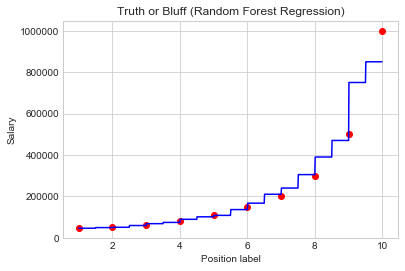

In [9]:
temp_x = df.loc[:, "Level"].values.reshape(-1,1)


X_grid = np.arange(min(temp_x), max(temp_x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Xs, y, c='red')
plt.plot(X_grid, regressor.predict(X_grid), c='blue')
plt.title("Truth or Bluff (Random Forest Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

In [10]:
print("With 10 trees, the models predicts a salary of ${0}".format(regressor.predict(6.5)[0]))


With 10 trees, the models predicts a salary of $167000.0


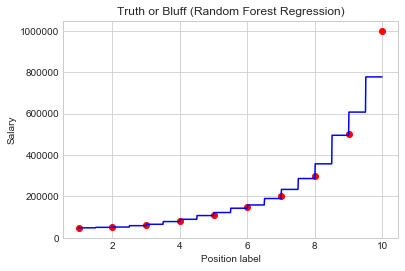

In [11]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(Xs,y)
    
    
temp_x = df.loc[:, "Level"].values.reshape(-1,1)


X_grid = np.arange(min(temp_x), max(temp_x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(Xs, y, c='red')
plt.plot(X_grid, regressor.predict(X_grid), c='blue')
plt.title("Truth or Bluff (Random Forest Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

In [13]:
print("With 100 trees, the models predicts a salary of ${0}".format(regressor.predict(6.5)[0]))


With 100 trees, the models predicts a salary of $158300.0
